In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as Logr
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/yes.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


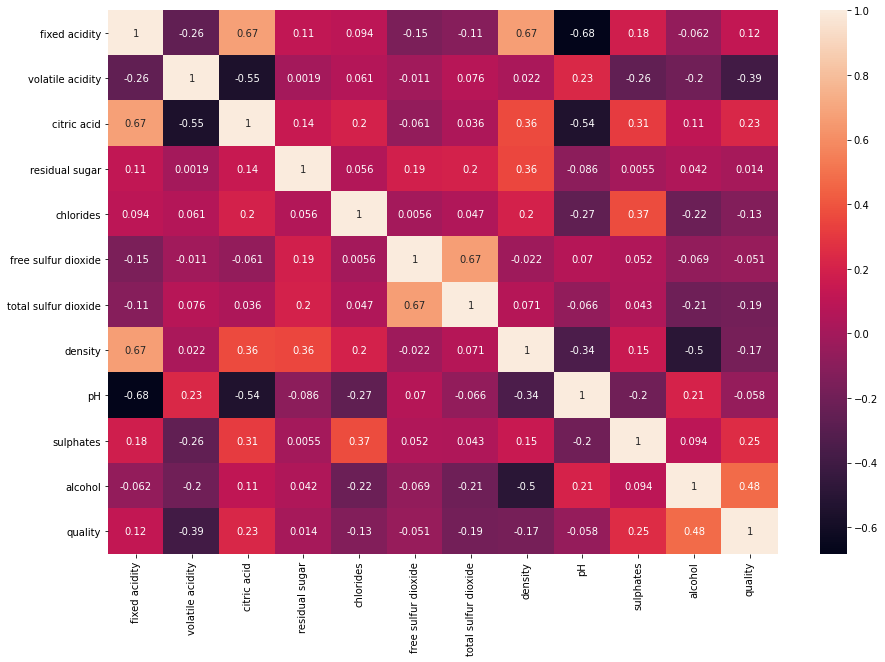

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot= True)
plt.show()


In [ ]:
y = df['quality']
x = df.drop(['quality'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, stratify=y, shuffle=True, random_state=1)

In [ ]:
logr = Logr(max_iter=10000)

In [ ]:
logr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
preds = logr.predict(x_test)

In [ ]:
train_preds = logr.predict(x_train)
training_acc = (sum(train_preds == y_train)/y_train.shape[0]) * 100

test_preds = logr.predict(x_test)
test_acc = (sum(test_preds == y_test)/y_test.shape[0]) * 100

print(f'Training Accuracy: {training_acc}')
print(f'Test Accuracy: {test_acc}')

Training Accuracy: 59.81235340109461
Test Accuracy: 60.3125


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   15.2s finished


Training metrics => 0.6512900703674745
Testing metrics => 0.590625


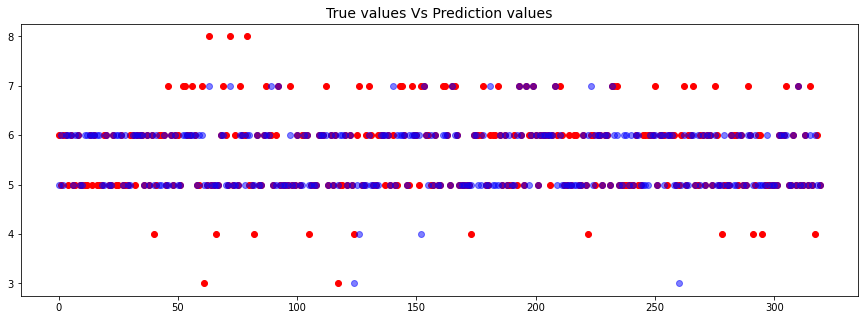

In [ ]:
degree = 2
poly = PolynomialFeatures(degree = degree)
new_x_train = poly.fit_transform ( x_train )
new_x_test = poly.fit_transform ( x_test )
nlogr = Logr(max_iter=7500, random_state=42, multi_class="ovr", n_jobs=-1, verbose=1)
nlogr.fit(new_x_train, y_train)
print("Training metrics =>", nlogr.score(new_x_train, y_train))
print("Testing metrics =>", nlogr.score(new_x_test, y_test))
y_pred = nlogr.predict(new_x_test)

x_axis_values = [i for i in range(y_test.shape[0])]
plt.figure(figsize=(15,5))
plt.title("True values Vs Prediction values", fontsize=14)
plt.scatter(x = x_axis_values, y = y_test, label = "True values" , color = "r" , alpha = 1.0 )
plt.scatter(x = x_axis_values, y = y_pred, label = "True values" , color = "b" , alpha = 0.5 )
plt.show()

In [ ]:
new_col = ['alcohol', 'citric acid', 'volatile acidity', 'sulphates']
new_X = df[new_col]
new_X_train, new_X_test, new_y_train, new_y_test = tts(new_X, y, test_size=0.2, random_state=42, stratify=y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Training metrics => 0.4222048475371384
Testing metrics => 0.4625


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished


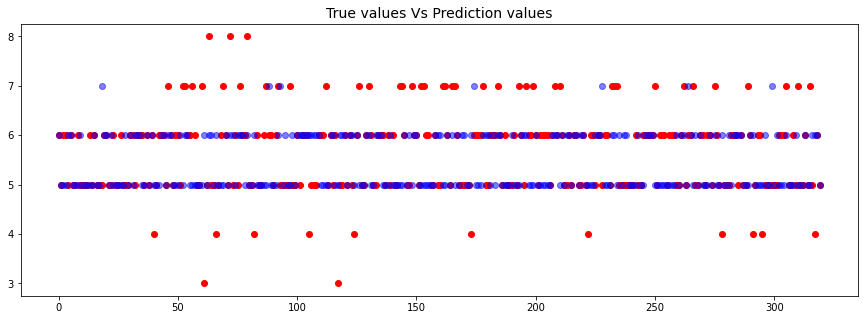

In [ ]:
degree = 2
poly = PolynomialFeatures(degree = degree)
n_x_train = poly.fit_transform (new_X_train)
n_x_test = poly.fit_transform (new_X_test)
nlogr = Logr(max_iter=7500, random_state=42, multi_class="ovr", n_jobs=-1, verbose=1)
nlogr.fit(n_x_train, new_y_train)
print("Training metrics =>", nlogr.score(n_x_train, y_train))
print("Testing metrics =>", nlogr.score(n_x_test, y_test))
ny_pred = nlogr.predict(n_x_test)

x_axis_values = [i for i in range(y_test.shape[0])]
plt.figure(figsize=(15,5))
plt.title("True values Vs Prediction values", fontsize=14)
plt.scatter(x = x_axis_values, y = y_test, label = "True values" , color = "r" , alpha = 1.0 )
plt.scatter(x = x_axis_values, y = ny_pred, label = "True values" , color = "b" , alpha = 0.5 )
plt.show()

In [ ]:
x = pd.read_csv("/content/yes.csv")

In [ ]:
Y = x['quality']
X = x.drop(['quality'], axis=1)

In [ ]:
over = SMOTE()
ox, oy = over.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
new_x = pd.DataFrame(ox)
new_y = pd.Series(oy)

new_df = pd.concat([new_x, new_y], axis=1)
new_df.columns = df.columns
new_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
ay = new_df['quality']
ax = new_df.drop(['quality'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = tts(ax, ay, test_size=0.2, stratify=y, shuffle=True, random_state=1)

In [ ]:
sa = StandardScaler()
new_x_train = sa.fit_transform(x_train)
new_x_test = sa.fit_transform(x_test)

In [ ]:
n = Logr(max_iter=7500)
n.fit(new_x_train, y_train)

ny_pred = n.predict(new_x_test)
print("Training metrics =>", n.score(new_x_train, y_train))
print("Testing metrics =>", n.score(new_x_test, y_test))

Training metrics => 0.585985312117503
Testing metrics => 0.5855745721271394


In [ ]:
poly = PolynomialFeatures(degree = 3,include_bias=False)
new_X_train = poly.fit_transform(new_x_train)
new_X_test = poly.fit_transform(new_x_test)

m = Logr(max_iter=7500, random_state=42, multi_class="ovr", n_jobs=-1, verbose=1)
m.fit(new_X_train, y_train)

ny_pred = n.predict(new_x_test)
print("Training metrics =>", m.score(new_X_train, y_train)*100)
print("Testing metrics =>", m.score(new_X_test, y_test)*100)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
